In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import medfilt
from scipy.io import loadmat

# Parameters

In [2]:
fft_size = 2048
fs = 2e6;
num_avg_window = 25

# Load & Reshape data

In [3]:
### Read in binary file ###
def fread(fid, dtype):
    if dtype is np.str:
        dt = np.uint8  # WARNING: assuming 8-bit ASCII for np.str!
    else:
        dt = dtype
        
    data_array = np.fromfile(fid, dt)
    #data_array.shape = (nelements, 1)

    return data_array

fid = open('Data/lights_A.bin', 'rb');
x =  fread(fid, 'single')

### Reshape data ###
T = int(len(x)/fft_size);
data = np.reshape(x, (fft_size,T), order="F")

### Get time ###
total_time = len(x)*(1/fs)
bin_duration = fft_size*(1/fs)
time = np.arange(0.0, total_time-(1/fs), bin_duration)

# Compute Averaged Frames

In [4]:
spectra_avg = np.zeros((fft_size, int(np.floor(T)/num_avg_window)))
count = 0;

for i in range(0,T-num_avg_window, num_avg_window):
    spectra_avg[:,count] = np.mean(data[:,i:i+num_avg_window-1],axis=1)
    count += 1

indices = np.arange(0, len(time)-num_avg_window, num_avg_window)
print(indices)
time = np.take(time, indices)

[    0    25    50 ... 27300 27325 27350]


# Abs & Sum each FFT Bin

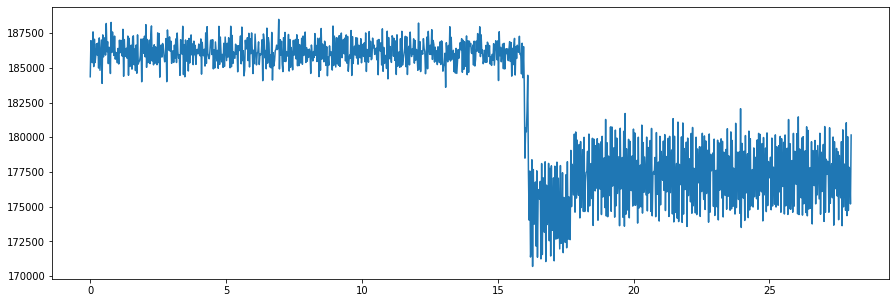

In [5]:
[rows, columns] = np.shape(spectra_avg)
signal = np.zeros(columns)


for i in range(columns):
    signal[i] = np.sum(np.abs(spectra_avg[:,i]))
    
plt.figure(figsize = (15,5))
plt.plot(time, signal)
plt.show()

# Normalize and Filter Data

In [6]:
### Testing using 22 hours of data ###
#x = loadmat('processed_emi.mat')
#signal = x['signal']
#signal = signal[0,:]
######################################

sig_norm = (signal - np.min(signal))/(np.max(signal)-np.min(signal))

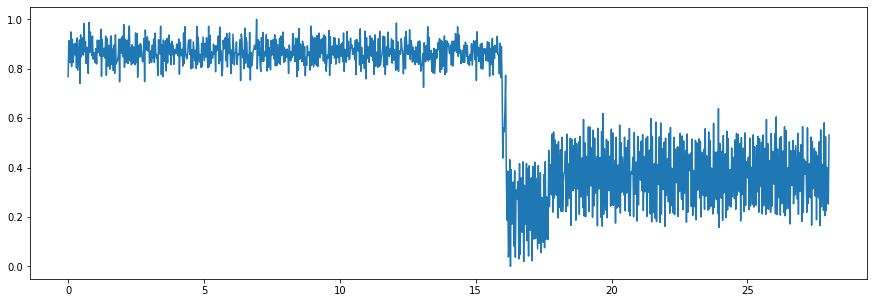

In [7]:
plt.figure(figsize = (15,5))
plt.plot(time, sig_norm)
plt.show()

# Remove Zero Outliers

In [14]:
for i in range(len(sig_norm)):
    if sig_norm[i] <= 0:
        sig_norm[i] = sig_norm[i+1]
        

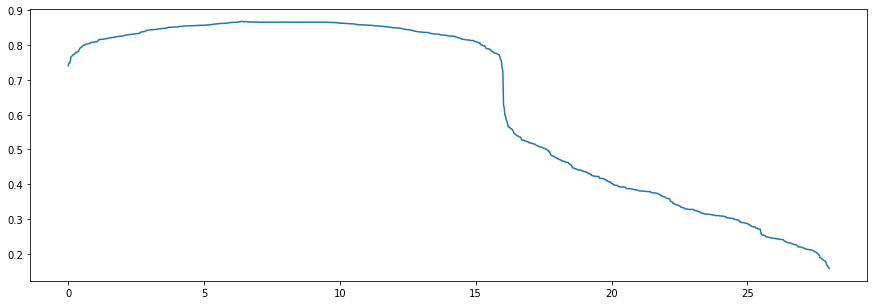

In [15]:
# !!! WINDOW SIZE MUST BE ODD !!! #
window_size = 501 
sig_filt = medfilt(sig_norm, window_size)

plt.figure(figsize = (15,5))
plt.plot(time, sig_filt)
plt.show()

In [10]:
np.savetxt('testsave.txt', sig_filt)